# Fourier point source

In [1]:
%load_ext autoreload
%autoreload 2
import site
import sys
site.addsitedir('..')

In [2]:
import numpy as np
from  matplotlib import pyplot as plt
from src.utils import *
from src.projection import project, rotate
from src.interpolate import *

## Important: in Fourier domain, the point is rotated in the fftshifted coordinates (i.e. 0 in the centre) - working now
Now it's working, no need to do it step by step from the next header

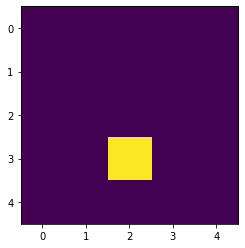

In [3]:
nx = 5

v = np.zeros([nx,nx,nx])
v[3,2,2] = 1
#v[1,1,0] = 1

plt.imshow(v[:,:,2])

In [4]:
x_freq = np.fft.fftfreq(nx)
y_freq = np.fft.fftfreq(nx)
z_freq = np.fft.fftfreq(nx)

X, Y, Z = np.meshgrid(x_freq, y_freq, z_freq, indexing = 'xy')


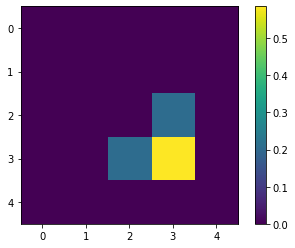

In [7]:
angles = np.array([0,0,np.pi/4])

vp, Xp, Yp, Zp = project(np.fft.ifftshift(v), X, Y, Z, angles, "tri")
plt.imshow(np.fft.fftshift(vp))
plt.colorbar()

### Do the steps in project

So far: angles = 0 is OK

In [119]:
angles = np.array([0,0,0])


X_r, Y_r,Z_r = rotate(X, Y, Z, angles)

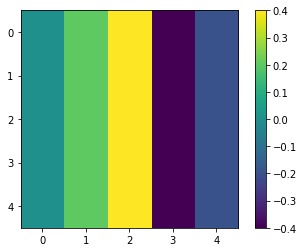

In [120]:
plt.imshow((X_r[:,:,0])); plt.colorbar()

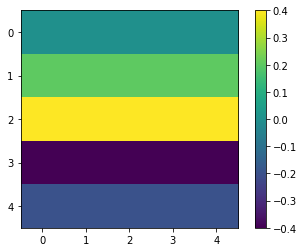

In [121]:
plt.imshow((Y_r[:,:,0])); plt.colorbar()

In [122]:
slice_coords = np.array([X_r[:,:,0].flatten(), Y_r[:,:,0].flatten(), Z_r[:,:,0].flatten()])
slice_coords.T

array([[ 0. ,  0. ,  0. ],
       [ 0.2,  0. ,  0. ],
       [ 0.4,  0. ,  0. ],
       [-0.4,  0. ,  0. ],
       [-0.2,  0. ,  0. ],
       [ 0. ,  0.2,  0. ],
       [ 0.2,  0.2,  0. ],
       [ 0.4,  0.2,  0. ],
       [-0.4,  0.2,  0. ],
       [-0.2,  0.2,  0. ],
       [ 0. ,  0.4,  0. ],
       [ 0.2,  0.4,  0. ],
       [ 0.4,  0.4,  0. ],
       [-0.4,  0.4,  0. ],
       [-0.2,  0.4,  0. ],
       [ 0. , -0.4,  0. ],
       [ 0.2, -0.4,  0. ],
       [ 0.4, -0.4,  0. ],
       [-0.4, -0.4,  0. ],
       [-0.2, -0.4,  0. ],
       [ 0. , -0.2,  0. ],
       [ 0.2, -0.2,  0. ],
       [ 0.4, -0.2,  0. ],
       [-0.4, -0.2,  0. ],
       [-0.2, -0.2,  0. ]])

In [123]:
X_r[:,:,0]

array([[ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2]])

In [124]:
Y_r[:,:,0]

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.2,  0.2,  0.2,  0.2,  0.2],
       [ 0.4,  0.4,  0.4,  0.4,  0.4],
       [-0.4, -0.4, -0.4, -0.4, -0.4],
       [-0.2, -0.2, -0.2, -0.2, -0.2]])

In [125]:
X[:,:,0]

array([[ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2]])

In [100]:
Y[:,:,0]

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.2,  0.2,  0.2,  0.2,  0.2],
       [ 0.4,  0.4,  0.4,  0.4,  0.4],
       [-0.4, -0.4, -0.4, -0.4, -0.4],
       [-0.2, -0.2, -0.2, -0.2, -0.2]])

In [101]:
v[:,:,0]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [102]:
slice_interp = interpolate(slice_coords, x_freq, y_freq, z_freq, v,"nn")
slice_interp_2d = slice_interp.reshape(X_r.shape[0], X_r.shape[1])

In [103]:
slice_interp

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

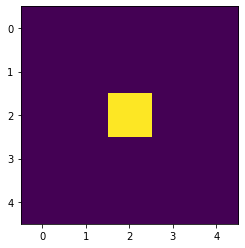

In [104]:
plt.imshow(slice_interp_2d)

In [105]:
slice_interp_2d

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])